# Clustering - DBSCAN

In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [67]:
np.random.seed(0)

In [69]:
def createDatPoints(centroidLocation, numSamples, clusterDeaviation):
    X,y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeaviation)
    X = StandardScaler().fit_transform(X)
    return X,y

In [137]:
X,y = createDatPoints(numSamples=1000, centroidLocation=[[4,3],[2,-1],[-1,4]],clusterDeaviation=0.7)

In [139]:
X[0:5]

array([[ 1.08813617,  0.21872757],
       [ 0.10691197, -1.06496766],
       [ 0.73331254,  0.44116269],
       [ 0.41037978, -1.41180793],
       [-0.92618501,  0.52244914]])

In [141]:
y[0:5]

array([0, 1, 0, 1, 2])

In [143]:
epsilon = 0.3
minsamples = 7
db = DBSCAN(eps=epsilon,min_samples=minsamples).fit(X)
labels = db.labels_
labels[0:10]

array([0, 1, 0, 1, 2, 0, 1, 2, 0, 1], dtype=int64)

In [145]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[0:5]

array([False, False, False, False, False])

In [146]:
db.core_sample_indices_[0:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [149]:
core_samples_mask[db.core_sample_indices_] = True

In [150]:
core_samples_mask[0:5]

array([ True,  True,  True,  True,  True])

In [152]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

In [154]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [155]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [173]:
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [171]:
~core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

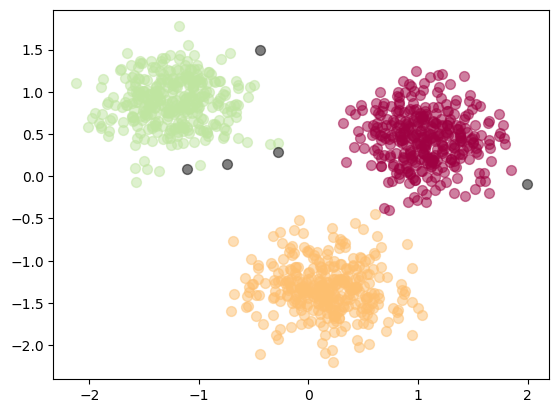

In [167]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)
    # Ploting the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=[col],marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=[col],marker=u'o', alpha=0.5)

plt.show()